## QUESTION 1

Standard deviation: It measure the diatance between individual point with the mean of the dataset. It shows the variability of individual in the dataset.It focus on the spread of individual.

Standard error of the mean: It is the distance between the mean of each sample with the population mean, it need to duplicate sampling process, which means it needs a bunch of sample. It shows the variability of each dataset in the sample in the population. It looks like the mean of the mean of each group. It focus on the reliability of each sample.

## QUESTION 2

95% confidence interval is 1.96 standard deviation, after get the bootstrapped, calculate the mean of bootstrapped sample, and +- 1.96 standard deviation

chatlog https://chatgpt.com/share/66fc4a8e-6988-800e-b461-df7808c060b8 (q1 and q2)

## QUESTION 3

95% contidence interval is the the interval between 2.5th to 97.5th percentils of the sorted bootstrapped means. We can directly use the generated mean of samples to use the pencentils of this interval. 


chatlog https://chatgpt.com/share/66fc4e01-2aa8-800e-9746-1c29fa5f5c80 (q3)

In [2]:
#QUESTION 4

import numpy as np

sample = np.array([2.3, 4.1, 5.7, 3.8, 6.9, 2.5, 3.1, 4.7, 5.0, 3.6])

n_bootstraps = 10000 #The time to dunplicate, we can change 10000 to every number from 0 to positive infinity

conf_level = 0.95 #95% contidence interval

#Definite a new function, there are 4 parameters: data, sta_func, n_bootstraps,c onf_level
#data: Origional sample data
#sta_func: The statictic function to apply
#n_bootstraps = 10000 (same as before)
#conf_level = 0.95 (same as before)
def bootstrap_confidence_interval(data, stat_func, n_bootstraps=10000, conf_level=0.95):
    """Generate a bootstrap confidence interval for a given statistic.
    
    Returns:
        tuple: Lower and upper bounds of the confidence interval.
    """
    
    bootstrap_stats = []

    # Use for loop to generate the data in samples
    for _ in range(n_bootstraps):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True) #Generate the data
        bootstrap_stat = stat_func(bootstrap_sample) #Caculate the statistic on the sample data
        bootstrap_stats.append(bootstrap_stat) #Store the data
    
    # The interval between 2.5th and 97.5th interval
    lower_percentile = (1 - conf_level) / 2 #0.025
    upper_percentile = 1 - lower_percentile #0.975
    
    lower_bound = np.percentile(bootstrap_stats, lower_percentile * 100)
    upper_bound = np.percentile(bootstrap_stats, upper_percentile * 100)
    
    return lower_bound, upper_bound

# 95% confidence interval for the mean
ci_mean = bootstrap_confidence_interval(sample, np.mean, n_bootstraps, conf_level)
print(f"95% Bootstrap Confidence Interval for the Mean: {ci_mean}")

# To calculate the 95% confidence interval for the median, change the function to np.median:
ci_median = bootstrap_confidence_interval(sample, np.median, n_bootstraps, conf_level)
print(f"95% Bootstrap Confidence Interval for the Median: {ci_median}")


95% Bootstrap Confidence Interval for the Mean: (3.35, 5.04)
95% Bootstrap Confidence Interval for the Median: (3.05, 5.2)


chatlog https://chatgpt.com/share/66fc5902-3804-800e-81ea-dd2b7b410e61 (q4)

## QUESTION 5

Popualation parameter is the charactistic of the entire population, it can not be change without changing the data in the population
Sample statistic is the value calculated from the population.
When we need to estimate the uncertainty, we use sample statistic to estimate the population parameter.For sample variability, we use sample statistic to find the vary from sample sample. Confidence interval can qualify these sample statistic and prepare the value for popolation parameter. 

chatlog https://chatgpt.com/share/66fcab8d-c7f0-800e-9896-1cac6a013a46 (q5)

## QUESTION 6

* What is the process of bootstrapping?

1. Need a sample, with n values in it.

2. Randomly choose n valuse from the sample, the values can be choose more than one time. Then calculate the mean of each 'new' samples and origional. 
   This should deplicate bunch of times.
   
3. Use the answer form last sept to get a distribution of the statistic from the bootstrape sample

4. Then find 95% confidence interval.

* What is the main purpose of bootstrapping?

It can use to estimate the variability (standard error) of a statistic construct confidence intervals for population parameters, and perfore hypothesis testing. Also, it do not need that huge sample. 

* If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

1. Randomly choose n valuse from the sample, the values can be choose more than one time. Then calculate the mean of each 'new' samples and origional. 
   This should deplicate bunch of times.
   
2. Use the answer form last sept to get a distribution of the statistic from the bootstrape sample

3. Then find 95% confidence interval.

4. If the hypothesized average in the donfidence interval, the guess might be plausible. 

## QUESTION 7

* Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? 

Because of the variability and uncertainty of the smaple, if null hypothesis is in the confidence interval, that means zero might still be the mean of the population.

* Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"?

If confidency interval exclude null hypothesis, that means it is not the plausibel value, so that we need to rject the null hypothesis.

## QUESTION 8

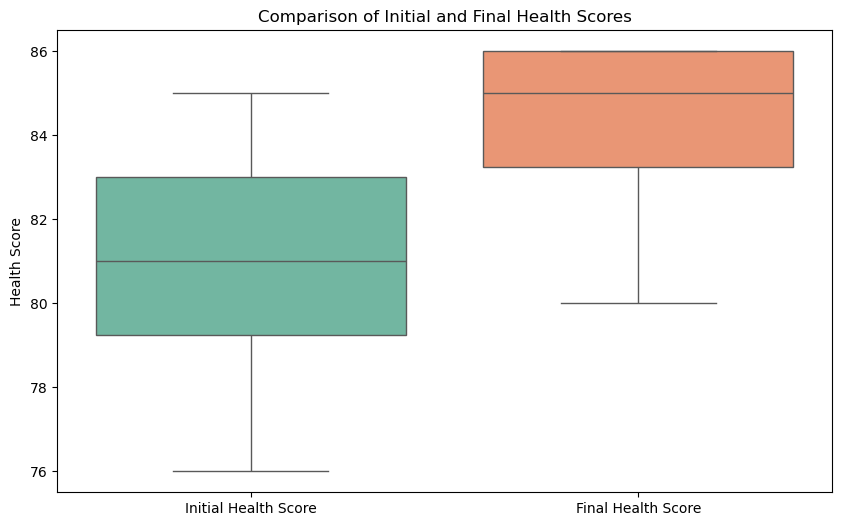

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=[df['InitialHealthScore'], df['FinalHealthScore']], palette="Set2", ax=ax)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Initial Health Score', 'Final Health Score'])
ax.set_title('Comparison of Initial and Final Health Scores')
ax.set_ylabel('Health Score')
plt.show()
fig.savefig("Comparison of Initial and final Health scores.png")



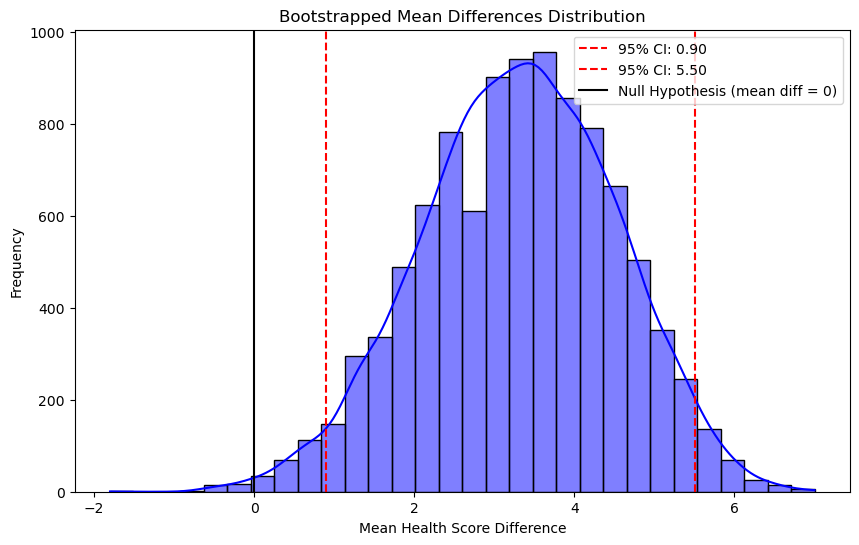

Mean Difference (Bootstrapped): 3.30321
95% Confidence Interval: [0.8975 5.5025]


In [14]:
import numpy as np

df = pd.DataFrame(data)

df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore'] # The difference

n_iterations = 10000  #Duplication times
n_size = len(df)  
diff_means = []  

# Perform bootstrapping
for i in range(n_iterations):
    sample = df.sample(n=n_size, replace=True)
    mean_diff = sample['HealthScoreDifference'].mean()
    diff_means.append(mean_diff)

# Convert to numpy array for analysis
diff_means = np.array(diff_means)

# Calculate the 95% confidence interval
conf_interval = np.percentile(diff_means, [2.5, 97.5])

# Visualize the distribution of the bootstrapped means
plt.figure(figsize=(10, 6))
sns.histplot(diff_means, kde=True, color='blue', bins=30)
plt.axvline(x=conf_interval[0], color='red', linestyle='--', label=f'95% CI: {conf_interval[0]:.2f}')
plt.axvline(x=conf_interval[1], color='red', linestyle='--', label=f'95% CI: {conf_interval[1]:.2f}')
plt.axvline(x=0, color='black', linestyle='-', label='Null Hypothesis (mean diff = 0)')
plt.title('Bootstrapped Mean Differences Distribution')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Summary statistics
mean_diff_bootstrap = np.mean(diff_means)
print(f"Mean Difference (Bootstrapped): {mean_diff_bootstrap}")
print(f"95% Confidence Interval: {conf_interval}")


chatlog https://chatgpt.com/share/66feabb9-9834-800e-bb1e-d991f1eafc5f

1. First use the boxplot comparing initial health score and final health score. We can see the first, second, third and fourth quartile, and the median, and to compare. 
2. The second method is bootstraping, we resample the data with replacement use the difference between each patient's initial and final health score 10000 times to get the bootstraping graph to quantitatively evaluate the effectiveness of the vaccine. Using bootstrapping in the graph, confidence interval is from 0.9 t0 5.50. Null hypothesis is outside the range, in this term, we reject the hull hypothesis. The null hypothesis in this case means the average difference between initial and final health scores is zero, the vaccine has no effect.
3. As a summary, we observe a general upward shift in the final health score, and also null hypothesis is regrcted, thats means there is an improvement in the patients health after taking the vaccine. 
4. For further consideration, the smaple only include 10 patients, for more accurate result, we can enpand the sample size. And also expand the range of age if possible. 